In [2]:
import kaggle
import os

kaggle.api.authenticate()
kaggle.api.dataset_download_files('lakshmi25npathi/imdb-dataset-of-50k-movie-reviews', path=os.getcwd(), unzip=True)


In [3]:
#read the data
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('IMDB Dataset.csv')
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
# Summary statistics for sentiments

df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
#Review length summary statistics
from helper_functions import clean_text
df['review'] = df['review'].apply(clean_text)  #cleaning the text
df['review_length'] = df['review'].str.split().apply(len)

df['review_length'].describe()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ctemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\ctemi\OneDrive\Desktop\Coursera\Advanced Data Science Spec\Advanced Data Science Capstone\helper_functions.py:48: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


count    50000.000000
mean       118.602820
std         89.270147
min          3.000000
25%         64.000000
50%         88.000000
75%        144.000000
max       1420.000000
Name: review_length, dtype: float64

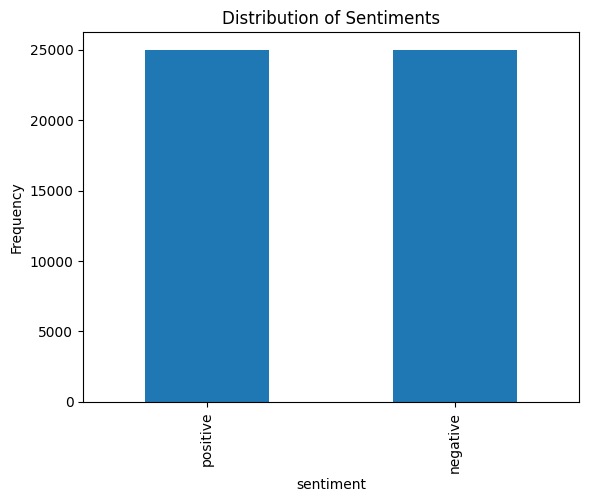

In [7]:
#sentiment Distribution

df['sentiment'].value_counts().plot(kind='bar')

plt.title('Distribution of Sentiments')
plt.ylabel('Frequency')
plt.show()

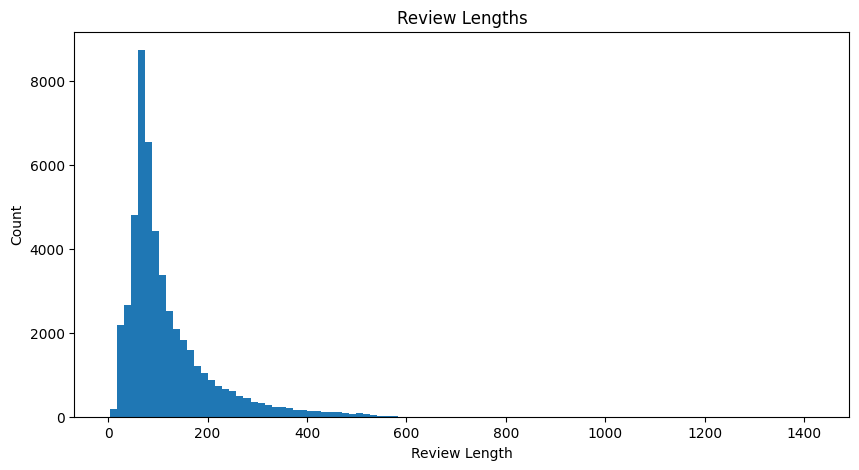

In [8]:
#review Lengths Histogram
import numpy as np

#bins and bin edges using np.histogram
counts, bin_edges = np.histogram(df['review_length'], bins=100)

plt.figure(figsize=(10,5))
plt.hist(df['review_length'], bins=100)

plt.title('Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')

plt.show()

In [9]:
from collections import Counter

all_words = " ".join(df['review']).split()
word_freq = Counter(all_words)

print("Most Common Words:", word_freq.most_common(10))


Most Common Words: [('movie', 83579), ('film', 74514), ('one', 50392), ('like', 38834), ('good', 28502), ('even', 24285), ('would', 24001), ('time', 23300), ('really', 22900), ('see', 22437)]


In [10]:
#preprocessing impact
from helper_functions import preprocess_text

sample_review = df['review'].iloc[0]
processed_review, _ = preprocess_text(sample_review, max_length=500)

print("Original Review:", sample_review)
print("Processed Review:", processed_review)

Original Review: one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well ma

In [13]:
from keras.preprocessing.text import Tokenizer

# Find the max sentence length


# Define a tokenizer outside the function
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])

# Apply the preprocess_text function to the review column
df['preprocessed_review'] = df.review.apply(lambda x: preprocess_text(x, max_length=max_sentence_length, tokenizer=tokenizer)[0][0])

# Display the DataFrame
df[['review', 'preprocessed_review']].head()



,review,preprocessed_review
0,one reviewers mentioned watching oz episode yo...,"[3, 1791, 932, 56, 3147, 282, 347, 2992, 107, ..."
1,wonderful little production filming technique ...,"[275, 38, 249, 1218, 2836, 17505, 81452, 1485,..."
2,thought wonderful way spend time hot summer we...,"[96, 275, 26, 979, 8, 774, 1331, 2320, 1054, 8..."
3,basically theres family little boy jake thinks...,"[567, 124, 136, 38, 325, 3437, 1059, 124, 900,..."
4,petter matteis love time money visually stunni...,"[81456, 33333, 35, 8, 187, 2002, 1236, 2, 29, ..."


In [14]:
all_reviews = " ".join(df['review'])
processed_reviews, tokenizer = preprocess_text(all_reviews, max_length=max_sentence_length)

print("Vocabulary Size:", len(tokenizer.word_index))



Vocabulary Size: 214481


In [31]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Label encoding


encoder = LabelEncoder()

int_encoded = encoder.fit_transform(df['sentiment'])
print(dict(zip(range(len(encoder.classes_)),encoder.classes_)))


one_hot = to_categorical(int_encoded)
df['one_hot'] = list(one_hot)


df.head(3)

{0: 'negative', 1: 'positive'}


,review,sentiment,review_length,preprocessed_review,one_hot
0,one reviewers mentioned watching oz episode yo...,positive,167,"[3, 1791, 932, 56, 3147, 282, 347, 2992, 107, ...","[0.0, 1.0]"
1,wonderful little production filming technique ...,positive,84,"[275, 38, 249, 1218, 2836, 17505, 81452, 1485,...","[0.0, 1.0]"
2,thought wonderful way spend time hot summer we...,positive,85,"[96, 275, 26, 979, 8, 774, 1331, 2320, 1054, 8...","[0.0, 1.0]"


In [32]:
import numpy as np

# Convert the 'preprocessed_review' column to int16
df['preprocessed_review'] = df['preprocessed_review'].apply(lambda x: x.astype(np.int16))

# Save the DataFrame as an HDF5 file
df.to_hdf('processed.h5', key='df', mode='w')


C:\Users\ctemi\AppData\Local\Temp\ipykernel_49960\4258075611.py:7: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['review', 'sentiment', 'preprocessed_review', 'one_hot'], dtype='object')]

  df.to_hdf('processed.h5', key='df', mode='w')
